In [10]:
import pandas as pd
import numpy as np


# Cargar la base de datos
df = pd.read_excel('BBDD TFG ALVARO SERRANO.xlsx', sheet_name='PARA LIMPIAR')

# Identificar filas completamente duplicadas
duplicados = df[df.duplicated()]
print(f"Filas duplicadas: {duplicados.shape[0]}")



Filas duplicadas: 69


In [12]:
def eliminar_filas_sin_banos(df):
    """
    Elimina las filas del DataFrame donde la columna 'bathrooms' es igual a 0.

    Parámetros:
    df (DataFrame): El DataFrame original.

    Retorna:
    DataFrame: Un nuevo DataFrame sin las filas con 'bathrooms' igual a 0.
    """
    # Filtrar el DataFrame para conservar solo las filas donde 'bathrooms' no sea igual a 0
    df_filtrado = df[df['bathrooms'] != 0]
    return df_filtrado

# Uso de la función
df_clean = eliminar_filas_sin_banos(df)

# Confirmar el cambio
print(f"Número de filas restantes: {len(df_clean)}")


Número de filas restantes: 1457


In [13]:
# Eliminar filas completamente duplicadas
df_clean = df.drop_duplicates()

# Verificar el resultado
print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de eliminar duplicados: {df_clean.shape[0]}")


Filas originales: 1458
Filas después de eliminar duplicados: 1389


In [14]:
# Identificar valores nulos
print("Valores nulos antes del tratamiento:")
print(df_clean.isnull().sum())

Valores nulos antes del tratamiento:
floor                       116
price                         0
priceInfo                     0
PropertyType simple           0
propertyType                  0
size                          0
exterior                    200
rooms                         0
bathrooms                     0
address                       0
district                      0
neighborhood                  0
latitude                      0
longitude                     0
showAddress                   0
status                        0
newDevelopment                0
hasLift                       0
priceByArea                 133
Precio por m2                 0
Tiene plaza                   0
Plaza incluida                0
ParkingSpace               1080
Parkin icnlude in price    1080
Precio Plaza                  0
Precio+plaza                  0
newDevelopmentFinished     1250
dtype: int64


In [15]:
# Convertir 'floor' a valores numéricos (convertirá errores a NaN)
df_clean['floor'] = pd.to_numeric(df_clean['floor'], errors='coerce')

# Imputar 'floor' con la mediana
df_clean['floor'] = df_clean['floor'].fillna(df_clean['floor'].median())

# Calcular 'priceByArea' si falta
df_clean['priceByArea'] = df_clean['priceByArea'].fillna(df_clean['price'] / df_clean['size'])

# Imputar 'exterior' con la moda
df_clean['exterior'] = df_clean['exterior'].fillna(df_clean['exterior'].mode()[0])

# Imputar columnas específicas con 0
columns_to_fill_zero = [
    'ParkingSpace',
    'Parkin icnlude in price',
    'newDevelopmentFinished'
]
df_clean[columns_to_fill_zero] = df_clean[columns_to_fill_zero].fillna(0)

# Verificar valores nulos restantes
print(df_clean.isnull().sum())


floor                      0
price                      0
priceInfo                  0
PropertyType simple        0
propertyType               0
size                       0
exterior                   0
rooms                      0
bathrooms                  0
address                    0
district                   0
neighborhood               0
latitude                   0
longitude                  0
showAddress                0
status                     0
newDevelopment             0
hasLift                    0
priceByArea                0
Precio por m2              0
Tiene plaza                0
Plaza incluida             0
ParkingSpace               0
Parkin icnlude in price    0
Precio Plaza               0
Precio+plaza               0
newDevelopmentFinished     0
dtype: int64


<ipython-input-15-a98f1c04121a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = pd.to_numeric(df_clean['floor'], errors='coerce')
<ipython-input-15-a98f1c04121a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].fillna(df_clean['floor'].median())
<ipython-input-15-a98f1c04121a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Mostrando Boxplot del Precio


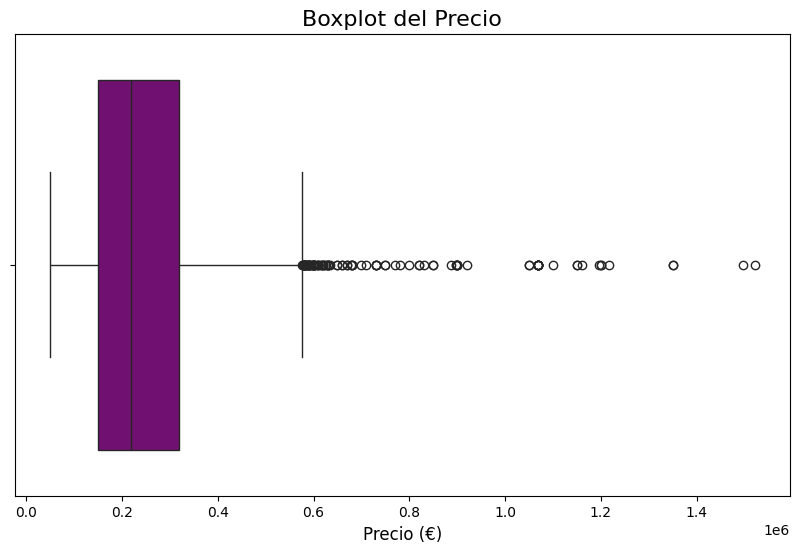

In [16]:

# 4. Boxplot de la variable 'price' (para visualizar la distribución y los posibles outliers)
print("Mostrando Boxplot del Precio")
plt.figure(figsize=(10,6))
sns.boxplot(x='price', data=df_clean, color='purple')
plt.title('Boxplot del Precio', fontsize=16)
plt.xlabel('Precio (€)', fontsize=12)
plt.show()

In [17]:
# Función para identificar outliers superiores en la columna de 'price'
def eliminar_outliers_superiores_precio(df):
    # Calcular Q1, Q3 y IQR para la columna 'price'
    Q1 = df_clean['price'].quantile(0.25)
    Q3 = df_clean['price'].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular el límite superior
    limite_superior = Q3 + 1.5 * IQR

    # Eliminar las filas donde el precio sea mayor que el límite superior
    df_sin_outliers_precio = df_clean[df_clean['price'] <= limite_superior]

    return df_sin_outliers_precio



In [18]:
# Eliminar outliers superiores en la columna 'price'
df_sin_outliers_precio = eliminar_outliers_superiores_precio(df)

# Verificar el número de filas antes y después de eliminar los outliers
print(f"Filas originales: {df_clean.shape[0]}")
print(f"Filas después de eliminar los outliers superiores en 'price': {df_sin_outliers_precio.shape[0]}")

Filas originales: 1389
Filas después de eliminar los outliers superiores en 'price': 1288


In [19]:
# Cálculos de medidas de tendencia central, dispersión y frecuencia
print("\nMedidas de Tendencia Central:")


Medidas de Tendencia Central:


In [20]:
# Media, Mediana y Moda de columnas numéricas
for column in df_sin_outliers_precio.select_dtypes(include=[np.number]).columns:
    print(f"{column}:")
    print(f"  Media: {df_sin_outliers_precio[column].mean()}")
    print(f"  Mediana: {df_sin_outliers_precio[column].median()}")
    print(f"  Moda: {df_sin_outliers_precio[column].mode()[0]}")


floor:
  Media: 2.895186335403727
  Mediana: 3.0
  Moda: 3.0
price:
  Media: 230066.4145962733
  Mediana: 202680.0
  Moda: 165000
size:
  Media: 77.07608695652173
  Mediana: 73.0
  Moda: 60
rooms:
  Media: 2.341614906832298
  Mediana: 2.0
  Moda: 3
bathrooms:
  Media: 1.3555900621118013
  Mediana: 1.0
  Moda: 1
latitude:
  Media: 362472725.488354
  Mediana: 403808374.0
  Moda: 40353224
longitude:
  Media: -33810540.74689441
  Mediana: -36703532.5
  Moda: -36818186
priceByArea:
  Media: 3096.9903755493856
  Mediana: 2817.0
  Moda: 2500.0
Precio por m2:
  Media: 3096.990131459294
  Mediana: 2816.6666666666665
  Moda: 2500.0
Precio Plaza:
  Media: 442.1583850931677
  Mediana: 0.0
  Moda: 0
Precio+plaza:
  Media: 7553.33850931677
  Mediana: 0.0
  Moda: 0


In [ ]:
# Rango, Desviación estándar y Varianza
for column in df_sin_outliers_precio.select_dtypes(include=[np.number]).columns:
    print(f"{column}:")
    rango = df_sin_outliers_precio[column].max() - df_sin_outliers_precio[column].min()
    desviacion_estandar = df_sin_outliers_precio[column].std()
    varianza = df_sin_outliers_precio[column].var()
    print(f"  Rango: {rango}")
    print(f"  Desviación estándar: {desviacion_estandar}")
    print(f"  Varianza: {varianza}")

print("\nMedidas de Frecuencia:")

price:
  Rango: 526000
  Desviación estándar: 118420.90448060042
  Varianza: 14023510618.00349
size:
  Rango: 243
  Desviación estándar: 29.851142777055614
  Varianza: 891.0907250961595
rooms:
  Rango: 7
  Desviación estándar: 0.9916862805816449
  Varianza: 0.9834416790938569
bathrooms:
  Rango: 3
  Desviación estándar: 0.5210620579593154
  Varianza: 0.2715056682447969
latitude:
  Rango: 403663317
  Desviación estándar: 116083140.67837207
  Varianza: 1.3475295549754722e+16
longitude:
  Rango: 37156659
  Desviación estándar: 9482766.825227436
  Varianza: 89922866661634.03
priceByArea:
  Rango: 8524.0
  Desviación estándar: 1368.4073254539178
  Varianza: 1872538.6083559447
Precio por m2:
  Rango: 8523.563025210084
  Desviación estándar: 1359.2021523334436
  Varianza: 1847430.4909078653
Precio Plaza:
  Rango: 30000
  Desviación estándar: 3075.006497070126
  Varianza: 9455664.957023486
Precio+plaza:
  Rango: 565000
  Desviación estándar: 53789.87843690151
  Varianza: 2893351022.2566423

Me

In [ ]:
# Frecuencia Absoluta, Relativa y Acumulada
for column in df_sin_outliers_precio.select_dtypes(include=[np.number]).columns:
    print(f"{column}:")
    frecuencia_absoluta = df_sin_outliers_precio[column].value_counts()
    frecuencia_relativa = df_sin_outliers_precio[column].value_counts(normalize=True)
    frecuencia_acumulada = df_sin_outliers_precio[column].value_counts().sort_index().cumsum()
    print(f"  Frecuencia absoluta:")
    print(frecuencia_absoluta)
    print(f"  Frecuencia relativa:")
    print(frecuencia_relativa)
    print(f"  Frecuencia acumulada:")
    print(frecuencia_acumulada)

price:
  Frecuencia absoluta:
price
165000    17
220000    17
145000    16
270000    16
180000    15
          ..
319500     1
170100     1
322700     1
327000     1
576000     1
Name: count, Length: 479, dtype: int64
  Frecuencia relativa:
price
165000    0.013199
220000    0.013199
145000    0.012422
270000    0.012422
180000    0.011646
            ...   
319500    0.000776
170100    0.000776
322700    0.000776
327000    0.000776
576000    0.000776
Name: proportion, Length: 479, dtype: float64
  Frecuencia acumulada:
price
50000        2
52400        3
53000        6
54000        8
59000       10
          ... 
569000    1280
569900    1281
570000    1286
575000    1287
576000    1288
Name: count, Length: 479, dtype: int64
size:
  Frecuencia absoluta:
size
60     51
70     39
75     36
85     29
55     29
       ..
198     1
144     1
200     1
145     1
17      1
Name: count, Length: 149, dtype: int64
  Frecuencia relativa:
size
60     0.039596
70     0.030280
75     0.027950
85   

In [ ]:
#Importamos librerias para visualización de gráficos

import matplotlib.pyplot as plt
import seaborn as sns
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

Mostrando Diagrama de dispersión: Precio vs Tamaño


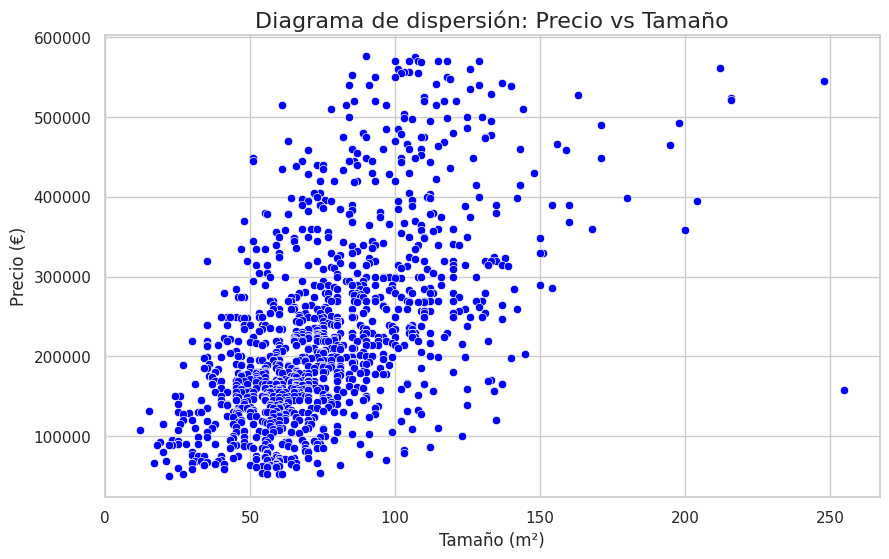

In [ ]:
# 1. Diagrama de dispersión entre 'price' y 'size' (tamaño)
print("Mostrando Diagrama de dispersión: Precio vs Tamaño")
plt.figure(figsize=(10,6))
sns.scatterplot(x='size', y='price', data=df_sin_outliers_precio, color='blue')
plt.title('Diagrama de dispersión: Precio vs Tamaño', fontsize=16)
plt.xlabel('Tamaño (m²)', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.show()

<ipython-input-44-4657e00c9c21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers_precio['floor'] = pd.to_numeric(df_sin_outliers_precio['floor'], errors='coerce')
<ipython-input-44-4657e00c9c21>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sin_outliers_precio['floo

Mostrando Diagrama de dispersión: Precio vs Piso


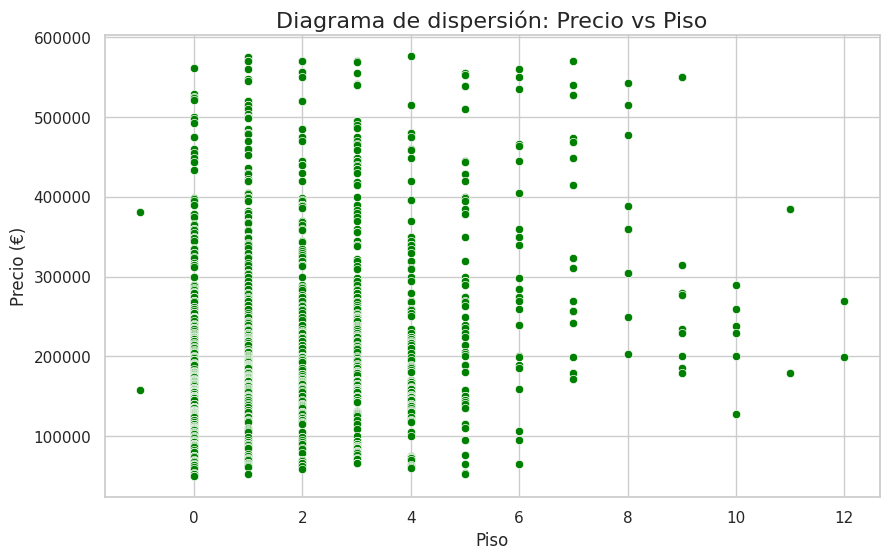

In [ ]:
# 2. Diagrama de dispersión entre 'price' y 'floor'

df_sin_outliers_precio['floor'] = pd.to_numeric(df_sin_outliers_precio['floor'], errors='coerce')

# Reemplazar los NaN por 0
df_sin_outliers_precio['floor'].fillna(0, inplace=True)

#grafico
print("Mostrando Diagrama de dispersión: Precio vs Piso")
plt.figure(figsize=(10,6))
sns.scatterplot(x='floor', y='price', data=df_sin_outliers_precio, color='green')
plt.title('Diagrama de dispersión: Precio vs Piso', fontsize=16)
plt.xlabel('Piso', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.show()

Mostrando Diagrama de dispersión: Precio por m² vs Precio Total


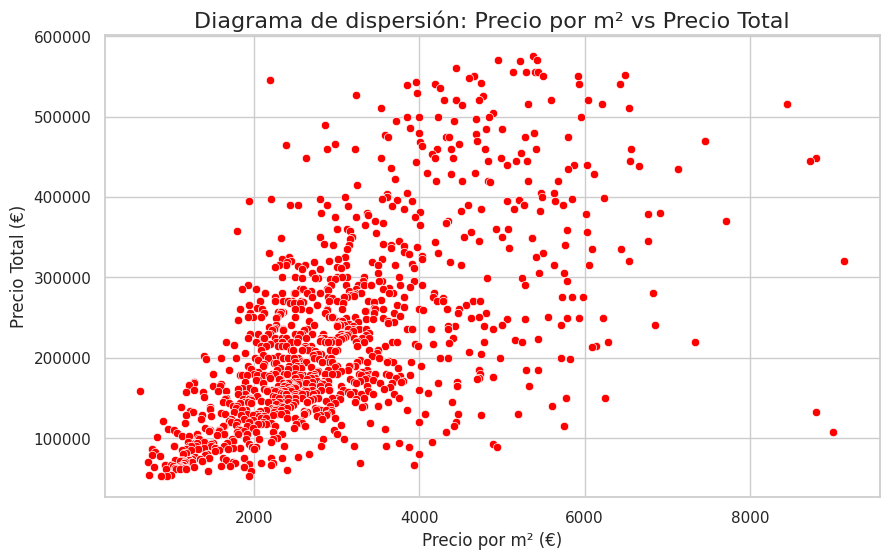

In [ ]:
# 3. Diagrama de dispersión entre 'price' y 'priceByArea' (Precio por metro cuadrado)
print("Mostrando Diagrama de dispersión: Precio por m² vs Precio Total")
plt.figure(figsize=(10,6))
sns.scatterplot(x='priceByArea', y='price', data=df_sin_outliers_precio, color='red')
plt.title('Diagrama de dispersión: Precio por m² vs Precio Total', fontsize=16)
plt.xlabel('Precio por m² (€)', fontsize=12)
plt.ylabel('Precio Total (€)', fontsize=12)
plt.show()

Mostrando Boxplot del Precio


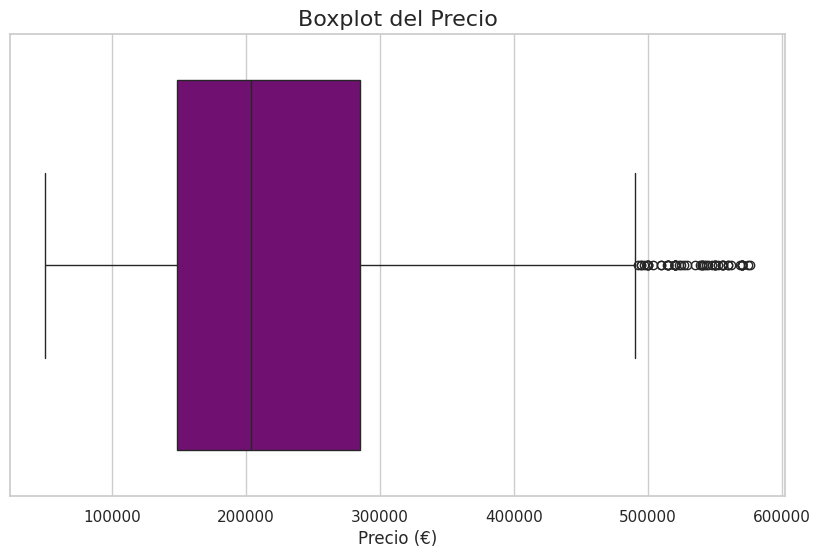

In [ ]:

# 4. Boxplot de la variable 'price' (para visualizar la distribución y los posibles outliers)
print("Mostrando Boxplot del Precio")
plt.figure(figsize=(10,6))
sns.boxplot(x='price', data=df_sin_outliers_precio, color='purple')
plt.title('Boxplot del Precio', fontsize=16)
plt.xlabel('Precio (€)', fontsize=12)
plt.show()

Mostrando Boxplot: Precio vs Exterior


<ipython-input-47-3da843a3ca11>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='exterior', y='price', data=df_sin_outliers_precio, palette="Set2")


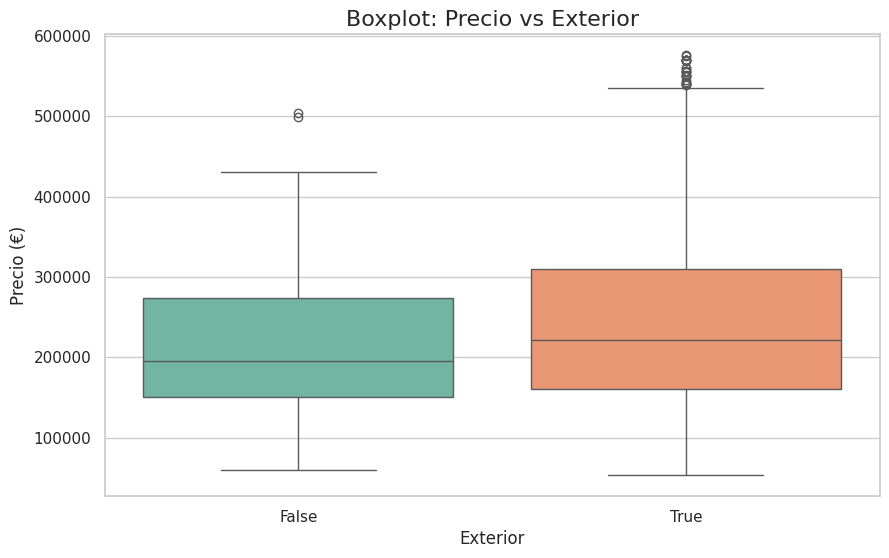

In [ ]:
# 5. Boxplot para ver la distribución de precios por tipo de 'exterior' (si es exterior o no)
print("Mostrando Boxplot: Precio vs Exterior")
plt.figure(figsize=(10,6))
sns.boxplot(x='exterior', y='price', data=df_sin_outliers_precio, palette="Set2")
plt.title('Boxplot: Precio vs Exterior', fontsize=16)
plt.xlabel('Exterior', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.show()

Mostrando Distribución del Precio de las Viviendas


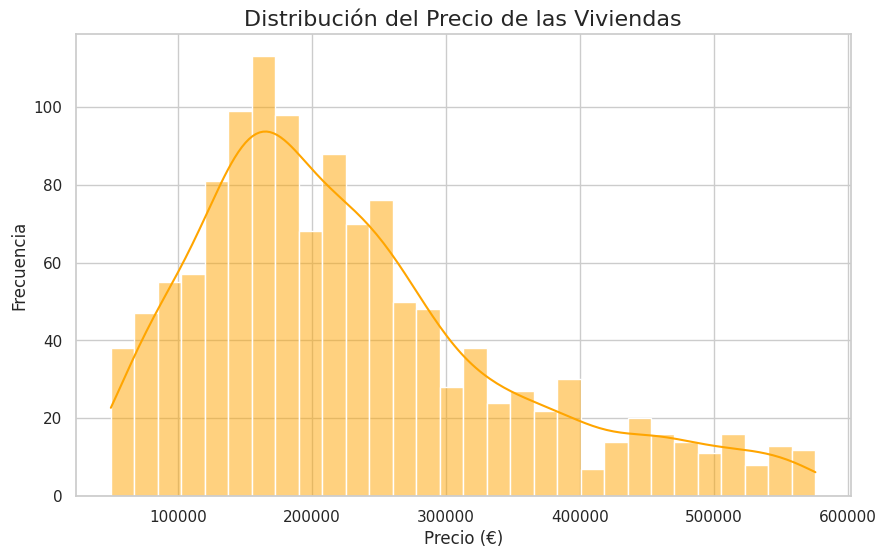

In [ ]:
# 6. Gráfico de distribución (histograma) del precio
print("Mostrando Distribución del Precio de las Viviendas")
plt.figure(figsize=(10,6))
sns.histplot(df_sin_outliers_precio['price'], kde=True, color='orange', bins=30)
plt.title('Distribución del Precio de las Viviendas', fontsize=16)
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Mostrando Pairplot: Relación entre Variables Numéricas


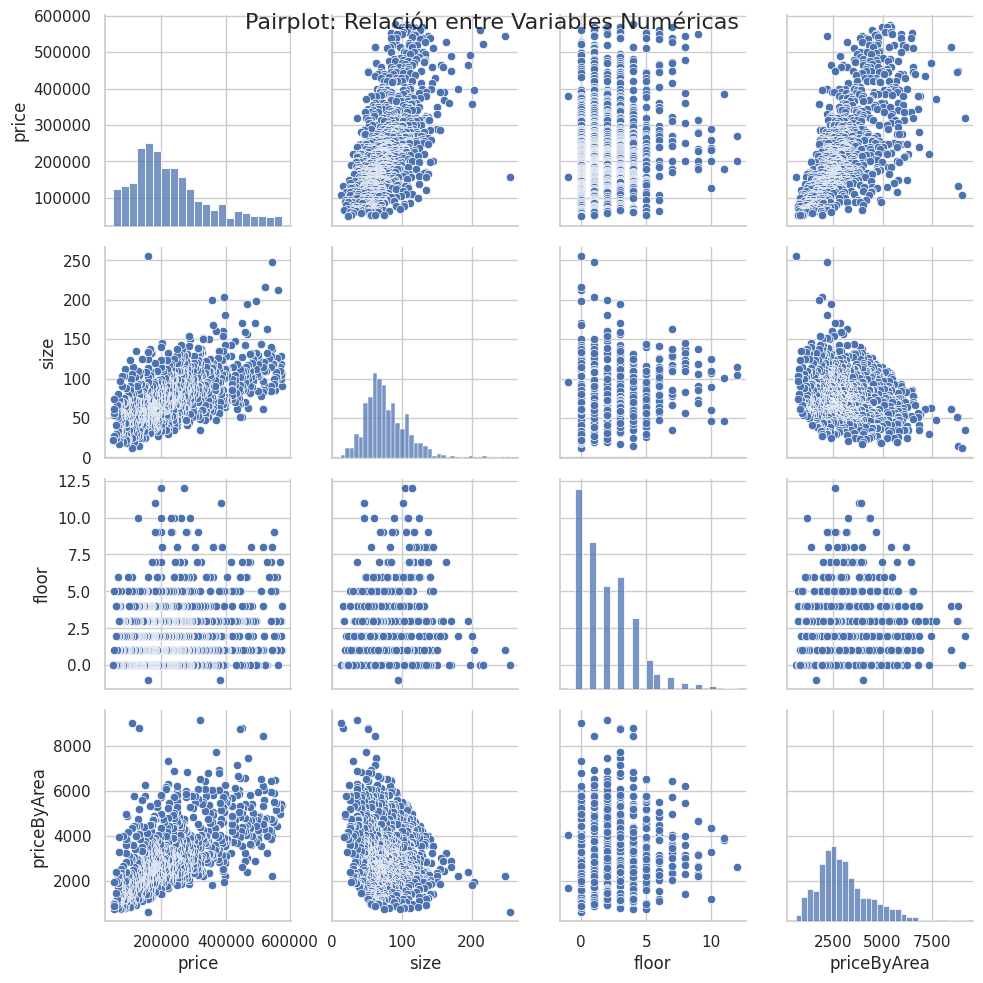

In [ ]:
# 7. Pairplot (diagrama de dispersión múltiple para explorar la relación entre varias variables numéricas)
print("Mostrando Pairplot: Relación entre Variables Numéricas")
sns.pairplot(df_sin_outliers_precio[['price', 'size', 'floor', 'priceByArea']])
plt.suptitle('Pairplot: Relación entre Variables Numéricas', fontsize=16)
plt.show()

Mostrando Distribución de Precios por Distrito


<ipython-input-50-cb31b0f68b60>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='district', y='price', data=df_sin_outliers_precio, palette="Set3")


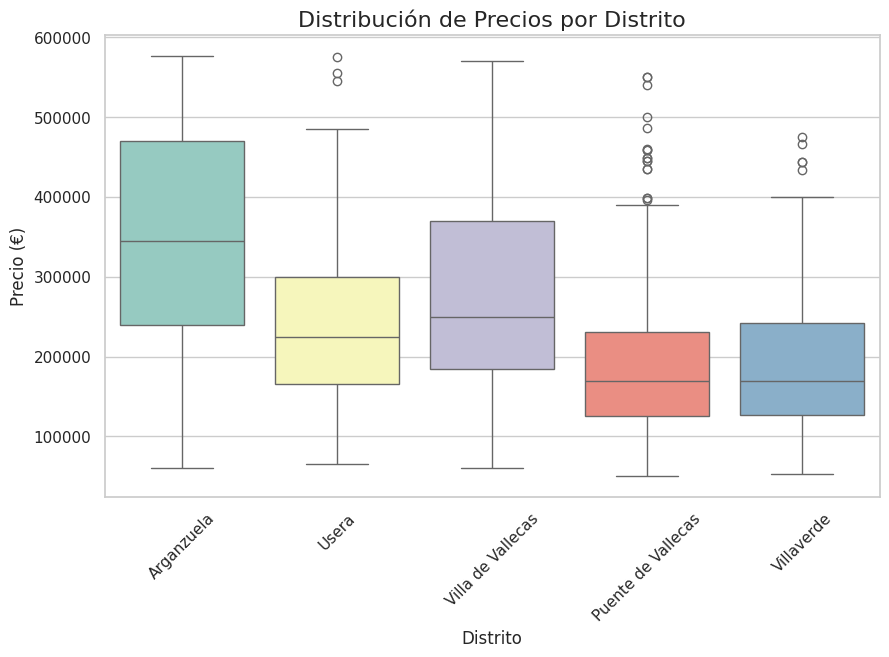

In [ ]:
# 9. Distribución de los precios por distrito

print("Mostrando Distribución de Precios por Distrito")
plt.figure(figsize=(10,6))
sns.boxplot(x='district', y='price', data=df_sin_outliers_precio, palette="Set3")
plt.title('Distribución de Precios por Distrito', fontsize=16)
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Mostrando Gráfico de Frecuencia de Exterior


<ipython-input-51-5178e7b773e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='exterior', data=df_sin_outliers_precio, palette="Set2")


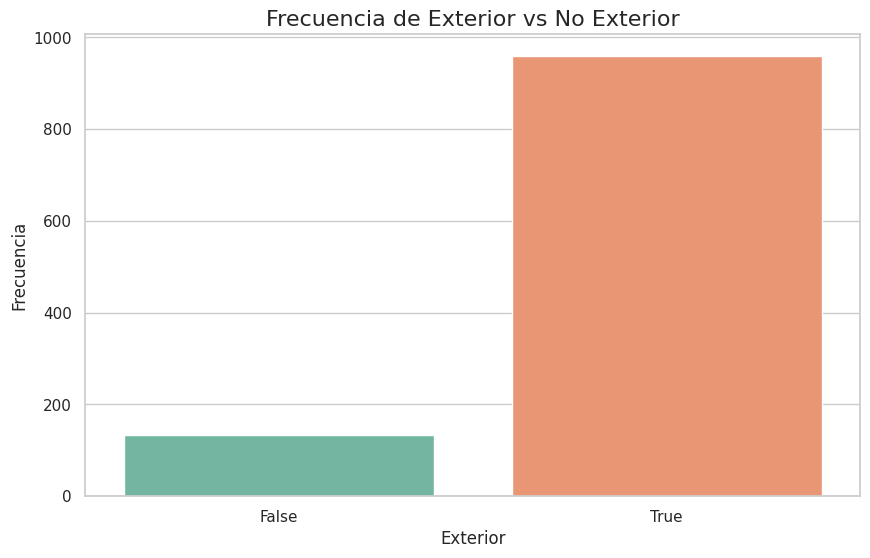

In [ ]:
# 10. Gráfico de barras de la frecuencia de 'exterior' (exterior vs no exterior)
print("Mostrando Gráfico de Frecuencia de Exterior")
plt.figure(figsize=(10,6))
sns.countplot(x='exterior', data=df_sin_outliers_precio, palette="Set2")
plt.title('Frecuencia de Exterior vs No Exterior', fontsize=16)
plt.xlabel('Exterior', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Mostrando Diagrama de Dispersión: Precio vs Tamaño, coloreado por Exterior


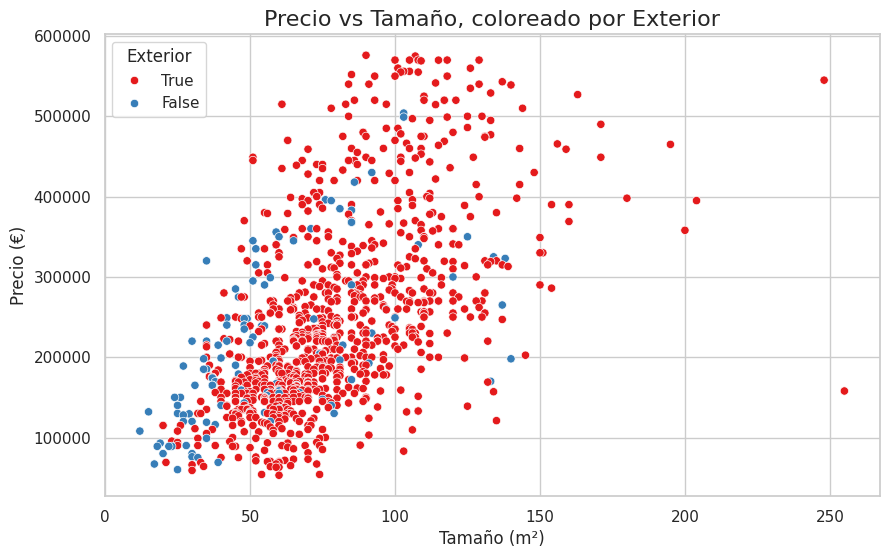

In [ ]:
# 11. Diagrama de dispersión de 'price' vs 'size' coloreado por 'exterior'
print("Mostrando Diagrama de Dispersión: Precio vs Tamaño, coloreado por Exterior")
plt.figure(figsize=(10,6))
sns.scatterplot(x='size', y='price', hue='exterior', data=df_sin_outliers_precio, palette="Set1")
plt.title('Precio vs Tamaño, coloreado por Exterior', fontsize=16)
plt.xlabel('Tamaño (m²)', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.legend(title='Exterior')
plt.show()

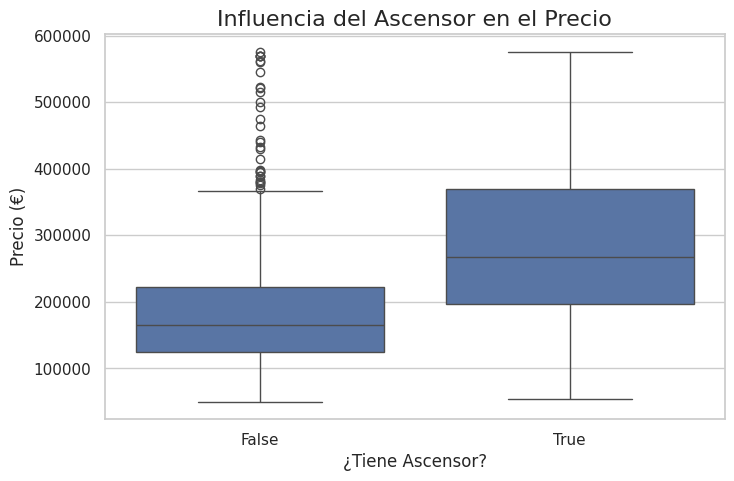

Gráfico de influencia del ascensor sobre el precio mostrado


In [ ]:
# 1. Gráfico de Dispersión: Precio vs. Ascensor
plt.figure(figsize=(8,5))
sns.boxplot(x='hasLift', y='price', data=df_sin_outliers_precio)
plt.title('Influencia del Ascensor en el Precio', fontsize=16)
plt.xlabel('¿Tiene Ascensor?', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.show()
print("Gráfico de influencia del ascensor sobre el precio mostrado")

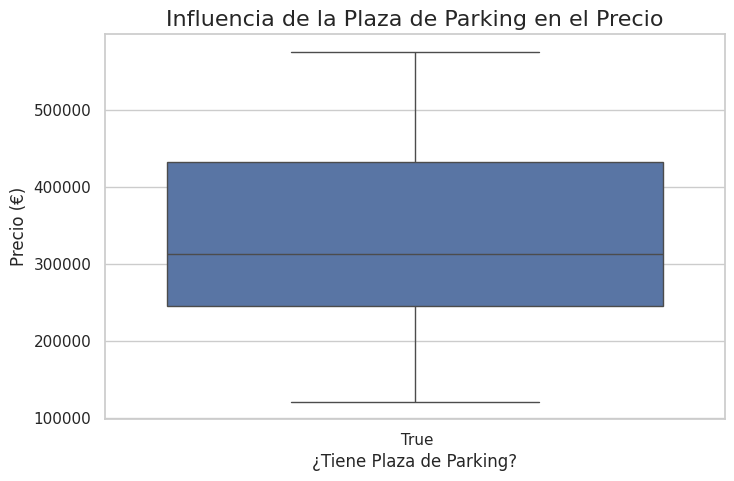

Gráfico de influencia de la plaza de parking sobre el precio mostrado


In [ ]:
# 2. Gráfico de Dispersión: Precio vs. Plaza de Parking
plt.figure(figsize=(8,5))
sns.boxplot(x='ParkingSpace', y='price', data=df_sin_outliers_precio)
plt.title('Influencia de la Plaza de Parking en el Precio', fontsize=16)
plt.xlabel('¿Tiene Plaza de Parking?', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.show()
print("Gráfico de influencia de la plaza de parking sobre el precio mostrado")

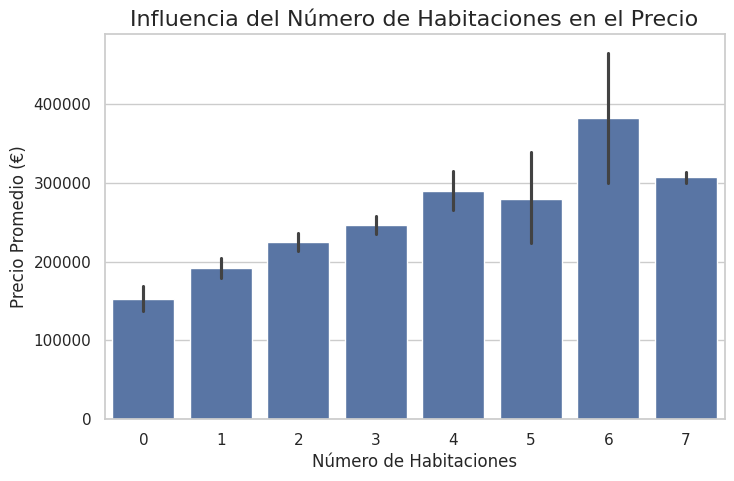

Gráfico de influencia del número de habitaciones sobre el precio mostrado


In [ ]:
# 3. Gráfico de Barras: Precio promedio por número de habitaciones
plt.figure(figsize=(8,5))
sns.barplot(x='rooms', y='price', data=df_sin_outliers_precio, estimator='mean')
plt.title('Influencia del Número de Habitaciones en el Precio', fontsize=16)
plt.xlabel('Número de Habitaciones', fontsize=12)
plt.ylabel('Precio Promedio (€)', fontsize=12)
plt.show()
print("Gráfico de influencia del número de habitaciones sobre el precio mostrado")

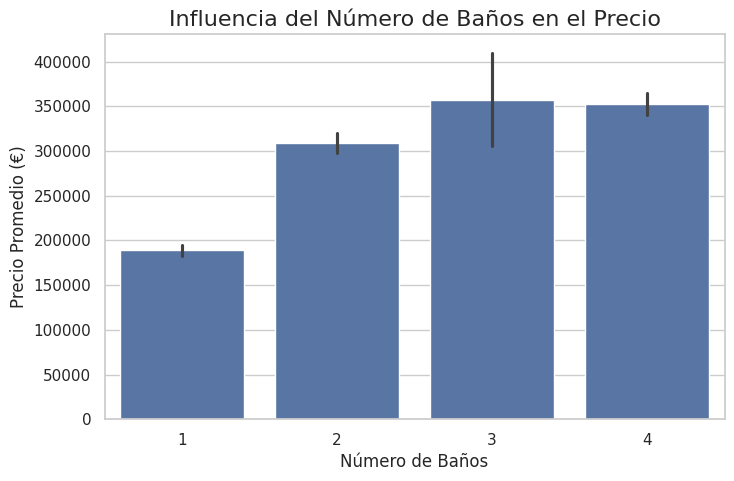

Gráfico de influencia del número de baños sobre el precio mostrado


In [ ]:

# 4. Gráfico de Barras: Precio promedio por número de baños
plt.figure(figsize=(8,5))
sns.barplot(x='bathrooms', y='price', data=df_sin_outliers_precio, estimator='mean')
plt.title('Influencia del Número de Baños en el Precio', fontsize=16)
plt.xlabel('Número de Baños', fontsize=12)
plt.ylabel('Precio Promedio (€)', fontsize=12)
plt.show()
print("Gráfico de influencia del número de baños sobre el precio mostrado")

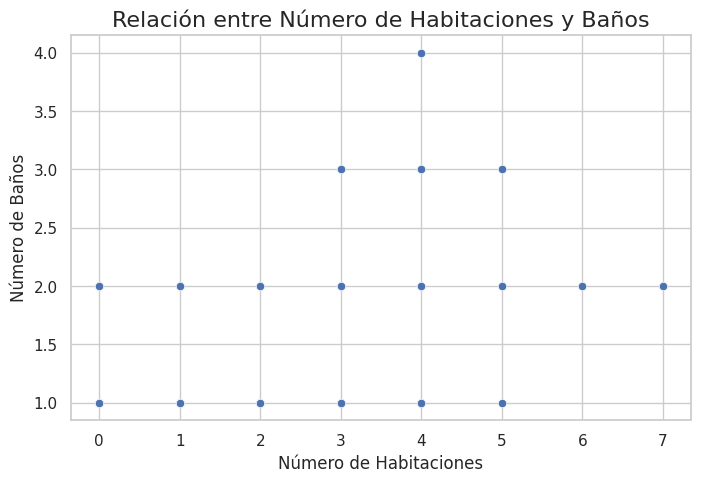

Gráfico de relación entre número de habitaciones y baños mostrado


In [ ]:
#Gráfico de dispersión entre el número de habitaciones y el número de baños
plt.figure(figsize=(8,5))
sns.scatterplot(x='rooms', y='bathrooms', data=df_sin_outliers_precio)
plt.title('Relación entre Número de Habitaciones y Baños', fontsize=16)
plt.xlabel('Número de Habitaciones', fontsize=12)
plt.ylabel('Número de Baños', fontsize=12)
plt.show()
print("Gráfico de relación entre número de habitaciones y baños mostrado")

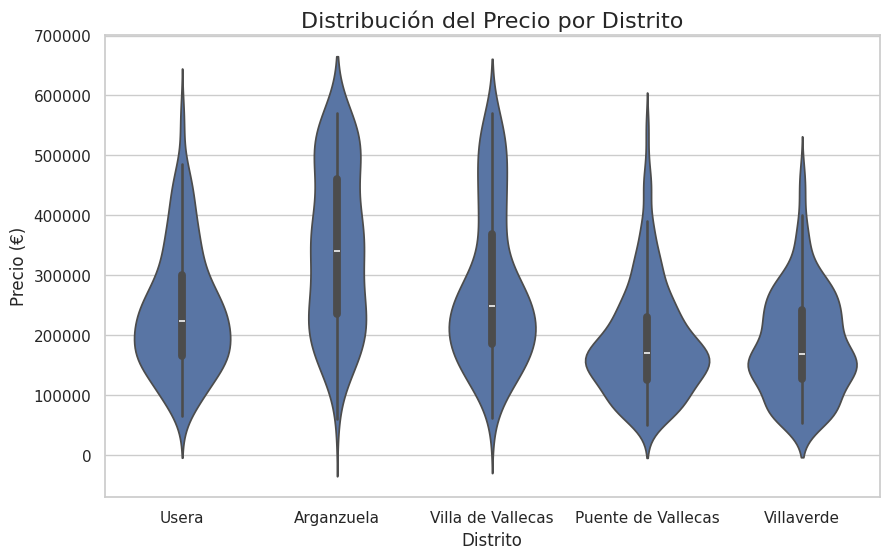

Gráfico de distribución del precio por distrito mostrado


In [ ]:
#Gráfico de violín de precio según distrito (o barrio)
plt.figure(figsize=(10,6))
sns.violinplot(x='district', y='price', data=df_sin_outliers_precio)
plt.title('Distribución del Precio por Distrito', fontsize=16)
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Precio (€)', fontsize=12)
plt.show()
print("Gráfico de distribución del precio por distrito mostrado")

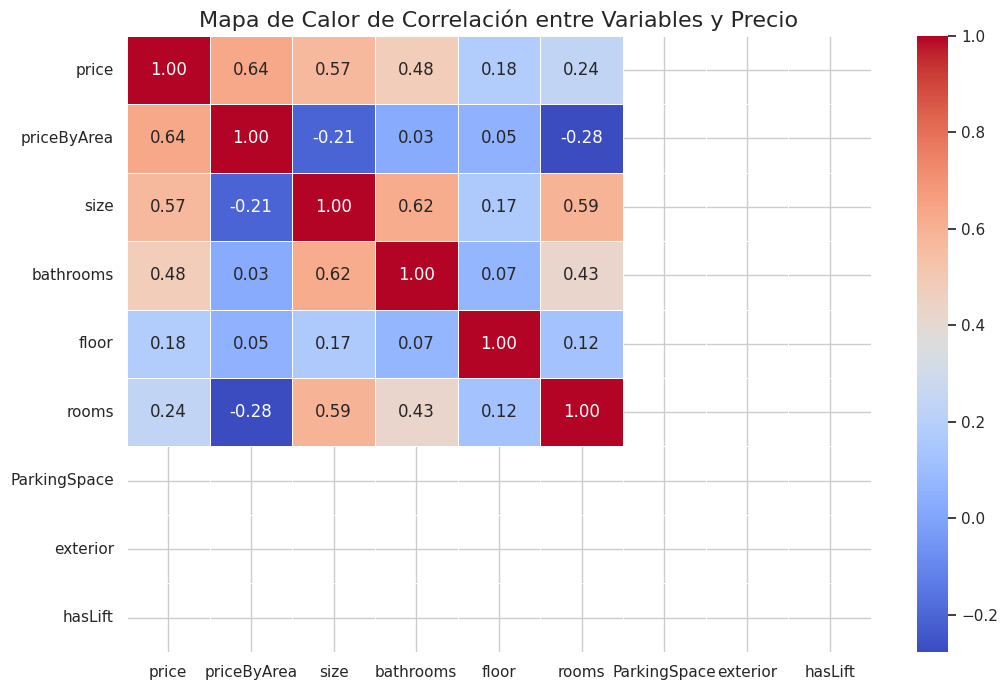

Mapa de calor actualizado mostrado


In [ ]:
#Mapa de calor relacion variables respecto a precio
# Asegúrate de usar .loc para modificar los valores de un subconjunto de DataFrame
df_sin_outliers_precio.loc[:, 'ParkingSpace'] = df_sin_outliers_precio['ParkingSpace'].apply(lambda x: 1 if x else 0)
df_sin_outliers_precio.loc[:, 'exterior'] = df_sin_outliers_precio['exterior'].apply(lambda x: 1 if x == 'True' else 0)
df_sin_outliers_precio.loc[:, 'hasLift'] = df_sin_outliers_precio['hasLift'].apply(lambda x: 1 if x == 'True' else 0)

# Seleccionamos las variables numéricas que queremos incluir en el análisis de correlación
correlation_matrix = df_sin_outliers_precio[['price', 'priceByArea', 'size', 'bathrooms', 'floor','rooms','ParkingSpace', 'exterior', 'hasLift']].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12,8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título del gráfico
plt.title('Mapa de Calor de Correlación entre Variables y Precio', fontsize=16)

# Mostrar el gráfico
plt.show()

# Mensaje informativo
print("Mapa de calor actualizado mostrado")

In [ ]:
# Guardar el DataFrame en un archivo CSV
df_sin_outliers_precio.to_csv('df_sin_outliers_precio.csv', index=True)


district
1           445
4           273
2           230
3           175
0           165
Name: count, dtype: int64
📊 Evaluación del Modelo:
MAE  (Error Absoluto Medio): 4857.09
MSE  (Error Cuadrático Medio): 70822596.12
RMSE (Raíz del MSE): 8415.62
R²   (Coeficiente de Determinación): 0.9946


<ipython-input-2-9c23a7ac9c72>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia_df["Importancia"], y=importancia_df["Variable"], palette="coolwarm")


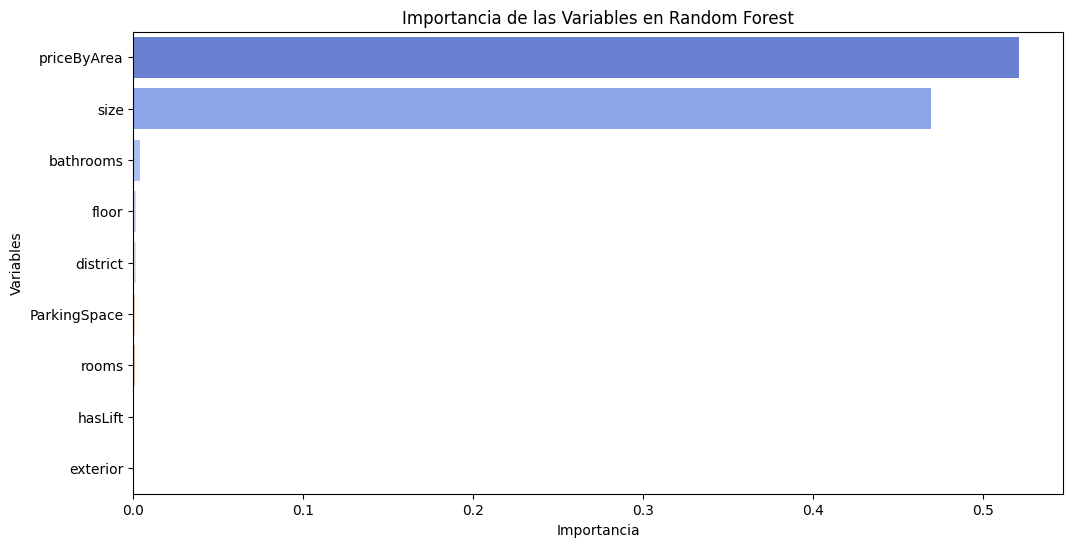

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 📌 Cargar el archivo Excel
df = pd.read_excel("BBDD serrano limpia.xlsx")

#  Revisar si hay valores nulos y manejarlos
df = df.dropna()  # Puedes cambiar esto si prefieres imputar valores

#  Convertir la variable 'district' en numérica con Label Encoding
label_encoder = LabelEncoder()
df['district'] = label_encoder.fit_transform(df['district'])

#  Verificar la conversión
print(df[['district']].value_counts())  # Muestra los valores numéricos asignados a cada distrito

#  Seleccionar variables relevantes
features = ['floor', 'district', 'size', 'exterior', 'rooms', 'bathrooms'
            , 'hasLift', 'priceByArea', 'ParkingSpace']

X = df[features]
y = df['price']

#  Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Entrenar modelo Random Forest
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

#  Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 Evaluación del Modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del MSE): {rmse:.2f}")
print(f"R²   (Coeficiente de Determinación): {r2:.4f}")

#  Obtener la importancia de las variables
importancia = modelo.feature_importances_
importancia_df = pd.DataFrame({'Variable': features, 'Importancia': importancia})
importancia_df = importancia_df.sort_values(by="Importancia", ascending=False)

#  Graficar importancia de las variables
plt.figure(figsize=(12, 6))
sns.barplot(x=importancia_df["Importancia"], y=importancia_df["Variable"], palette="coolwarm")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de las Variables en Random Forest")
plt.show()

Evaluación del Modelo de Regresión Lineal:
MAE  (Error Absoluto Medio): 23519.13
MSE  (Error Cuadrático Medio): 1090543819.61
RMSE (Raíz del MSE): 33023.38
R²   (Coeficiente de Determinación): 0.9169

 Coeficientes del Modelo:
         Variable   Coeficiente
0     priceByArea     66.046904
1            size   2500.847916
2       bathrooms   3492.261713
3    ParkingSpace  10591.166945
4         hasLift   9509.302824
5           rooms   8603.151106
6           floor   -120.295063
7        exterior  24986.824884
8  newDevelopment  15212.059668


<ipython-input-1-a72abc2586b7>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeficientes["Coeficiente"], y=coeficientes["Variable"], palette="coolwarm")


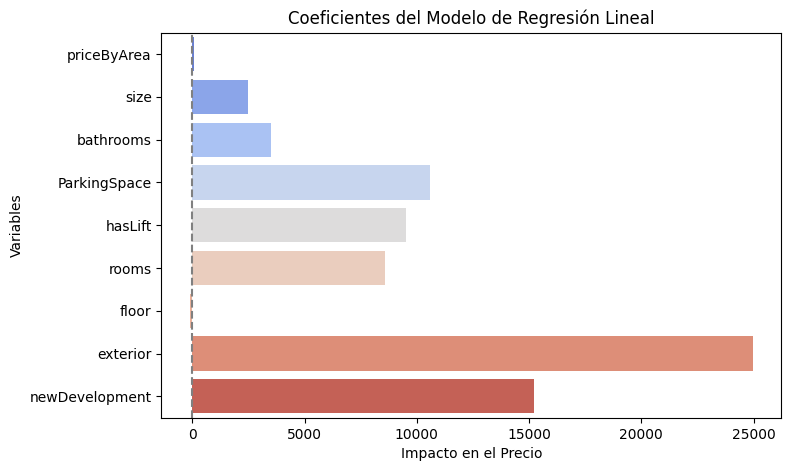

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Cargar el archivo Excel
df = pd.read_excel("BBDD serrano limpia.xlsx")

#  Revisar si hay valores nulos y manejarlos
df = df.dropna()  # Puedes cambiarlo por imputación si es necesario

#  Seleccionar las variables predictoras y la variable objetivo
features = ['priceByArea', 'size', 'bathrooms', 'ParkingSpace', 'hasLift','rooms','floor','exterior','newDevelopment']
X = df[features]
y = df['price']

#  Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Evaluación del Modelo de Regresión Lineal:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del MSE): {rmse:.2f}")
print(f"R²   (Coeficiente de Determinación): {r2:.4f}")

# Obtener coeficientes y mostrar su impacto en el precio
coeficientes = pd.DataFrame({'Variable': features, 'Coeficiente': modelo.coef_})
print("\n Coeficientes del Modelo:")
print(coeficientes)

# Graficar los coeficientes
plt.figure(figsize=(8, 5))
sns.barplot(x=coeficientes["Coeficiente"], y=coeficientes["Variable"], palette="coolwarm")
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("Impacto en el Precio")
plt.ylabel("Variables")
plt.title("Coeficientes del Modelo de Regresión Lineal")
plt.show()
